In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
df = pd.read_csv("housebed.csv")
print(df)

   Number of Bedrooms  House Price
0                   5       245000
1                   1        48700
2                   3       152400
3                   1        51500
4                   3       148250
5                   5       255500
6                   2        97750
7                   2       102250
8                   2       102050
9                   3       149900


In [2]:
#Show values and size of data being used
print(df['Number of Bedrooms'].values) 
print(df['Number of Bedrooms'].shape)

print(df['House Price'].values) 
print(df['House Price'].shape)

[5 1 3 1 3 5 2 2 2 3]
(10,)
[245000  48700 152400  51500 148250 255500  97750 102250 102050 149900]
(10,)


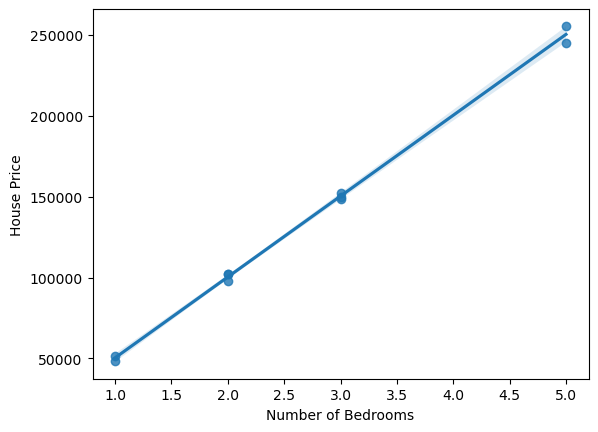

In [3]:
#Use Seaborn to show plot
sns.regplot(data = df, x = 'Number of Bedrooms', y = 'House Price', ci = None)
plt.show()


In [14]:
#Training data 70%, Test data 30%
from sklearn.model_selection import train_test_split
X = df['Number of Bedrooms'].values.reshape(-1, 1)
y = df['House Price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(X_train)
print(y_train)
#print(X_train.shape)
#print(y_train.shape)

[[3]
 [1]
 [1]
 [2]
 [5]
 [3]
 [2]]
[[149900]
 [ 48700]
 [ 51500]
 [102250]
 [245000]
 [148250]
 [102050]]


In [15]:
#Using sklean linear regression model type
#Note : Every time this is run test and training data will change so bias and weight will change
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#This is the bias value if we look at y=wx+b
print("bias = ", regressor.intercept_)
#This is the weight value
print("weight = ", regressor.coef_)

bias =  [2990.24390244]
weight =  [[48630.48780488]]


In [16]:
#So the equation of the line becomes:
#House Price = (48841 * Number of Bedrooms) + 2490
#Using the predict function we can test if it works
price = regressor.predict([[5]])
print(price)


[[246142.68292683]]


In [17]:
#Test prediction using test data, by comparing to actual data
y_pred = regressor.predict(X_test)
df_preds = pd.DataFrame(y_pred.squeeze(), y_test.squeeze(), )
print(df_preds)


                    0
255500  246142.682927
97750   100251.219512
152400  148881.707317


In [18]:
#Check accuracy train and test data
print("Train data ", regressor.score(X_train, y_train))
print("Test data ", regressor.score(X_test, y_test))

Train data  0.9993320201185436
Test data  0.991725431682848


In [19]:
#Evaluate model use sklearn metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
#print(X_test)
#print(y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
#Answers are different to PowerPoint as only test data used to calclate MAE and MSE
print('MAE = ', mae)
print('MSE = ', mse)

MAE =  5125.609756097561
MSE =  35397955.08625819


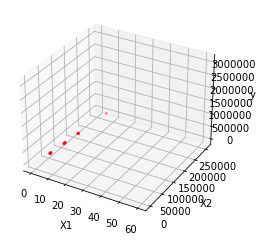

In [20]:
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], y_train, marker='.', color='red')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

coefs = regressor.coef_
intercept = regressor.intercept_
xs = np.tile(np.arange(61), (61,1))
ys = np.tile(np.arange(61), (61,1)).T
zs = xs*coefs[0]+intercept
#print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0]))
plt.ticklabel_format(useOffset=False)
ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()